# Notebook explaining the nuts and bots of data cartography implementation in enginora

Implementation of the concept of data cartography as outlined in the paper: https://aclanthology.org/2020.emnlp-main.746/. As the authors write:

 *Large datasets have become commonplace in NLP research. However, the increased emphasis on data quantity has made it challenging to assess the quality of data. We introduce Data Maps—a model-based tool to characterize and diagnose datasets. We leverage a largely ignored source of information: thebehavior of the model on individual instances during training (training dynamics) for building data maps. This yields two intuitive measures for each example—the model’s confidence in the true class, and the variability ofthis confidence across epochs—obtained in a single run of training. Experiments across four datasets show that these model-dependent measures reveal three distinct regions in the data map, each with pronounced characteristics. First, our data maps show the presence of ambiguous regions with respect to the model, which contribute the most towards out-of-distribution generalization. Second, the most populous regions in the data are easy to learn for the model, and play an important role in model optimization. Finally, data maps uncover a region with instances that the model finds hard to learn; these often correspond to labeling errors. Our results indicate that a shift in focus from quantity to quality of data could lead to robust models and improved out-of-distribution generalization.*

## Step 1: 
Run Data Cartography, in the training config, set perform_data_cartography to True, and make sure you provide a distinict validatoon set, so that data cartography can be conducted on the whole of the training set. You can set a file destination for the data cartography results.
Make sure it looks something like this:

```
training:
  dataset_path: ../../data/featuresets/thedeep.subset.train.txt
  validation_dataset_path: ../../data/featuresets/thedeep.subset.validation.txt
  selectors:
    - args: { }
      name: dummy
  batch_size: 2
  epochs: 2
  learning_rate: 1e-3
  validation_size: 0.2
  output_dir: ClassificationBERT # set data_seed
  metric_for_best_model: f1_score
  perform_data_cartography: True
```

In [1]:
import t2r2
import logging
import os

In [2]:
os.environ['WANDB_DISABLED'] = 'true'

logging.basicConfig(format="[%(filename)s:%(lineno)s - %(funcName)20s() ] %(message)s", level=logging.INFO)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ./results/checkpoint-25
Configuration saved in ./results/checkpoint-25\config.json
Model weights saved in ./results/checkpoint-25\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ./results/checkpoint-50
Configuration saved in ./results/checkpoint-50\config.json
Model weights saved in ./results/checkpoint-50\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ./results/checkpoint-75
Configuration saved in ./results/checkpoint-75\config.json
Model weights saved in ./results/checkpoint-75\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ./results/checkpoint-100
Configuration saved in ./results/checkpoint-100\config.json
Model weights saved in ./results/checkpoint-100\pytorch_model.bin
***** Running Evaluation 

***** Running Prediction *****
  Num examples = 9
  Batch size = 2


{'train_results': {'train_runtime': 822.8571,
  'train_samples_per_second': 0.425,
  'train_steps_per_second': 0.213,
  'total_flos': 46048568832000.0,
  'train_loss': 2.3527442496163506,
  'epoch': 7.0},
 'test_results': {'test_loss': 2.4406611919403076,
  'test_f1_score': 0.030303030303030304,
  'test_runtime': 4.0022,
  'test_samples_per_second': 2.499,
  'test_steps_per_second': 1.249},
 'control_results': {'test_loss': 2.6491708755493164,
  'test_f1_score': 0.07272727272727272,
  'test_runtime': 3.6535,
  'test_samples_per_second': 2.463,
  'test_steps_per_second': 1.369}}

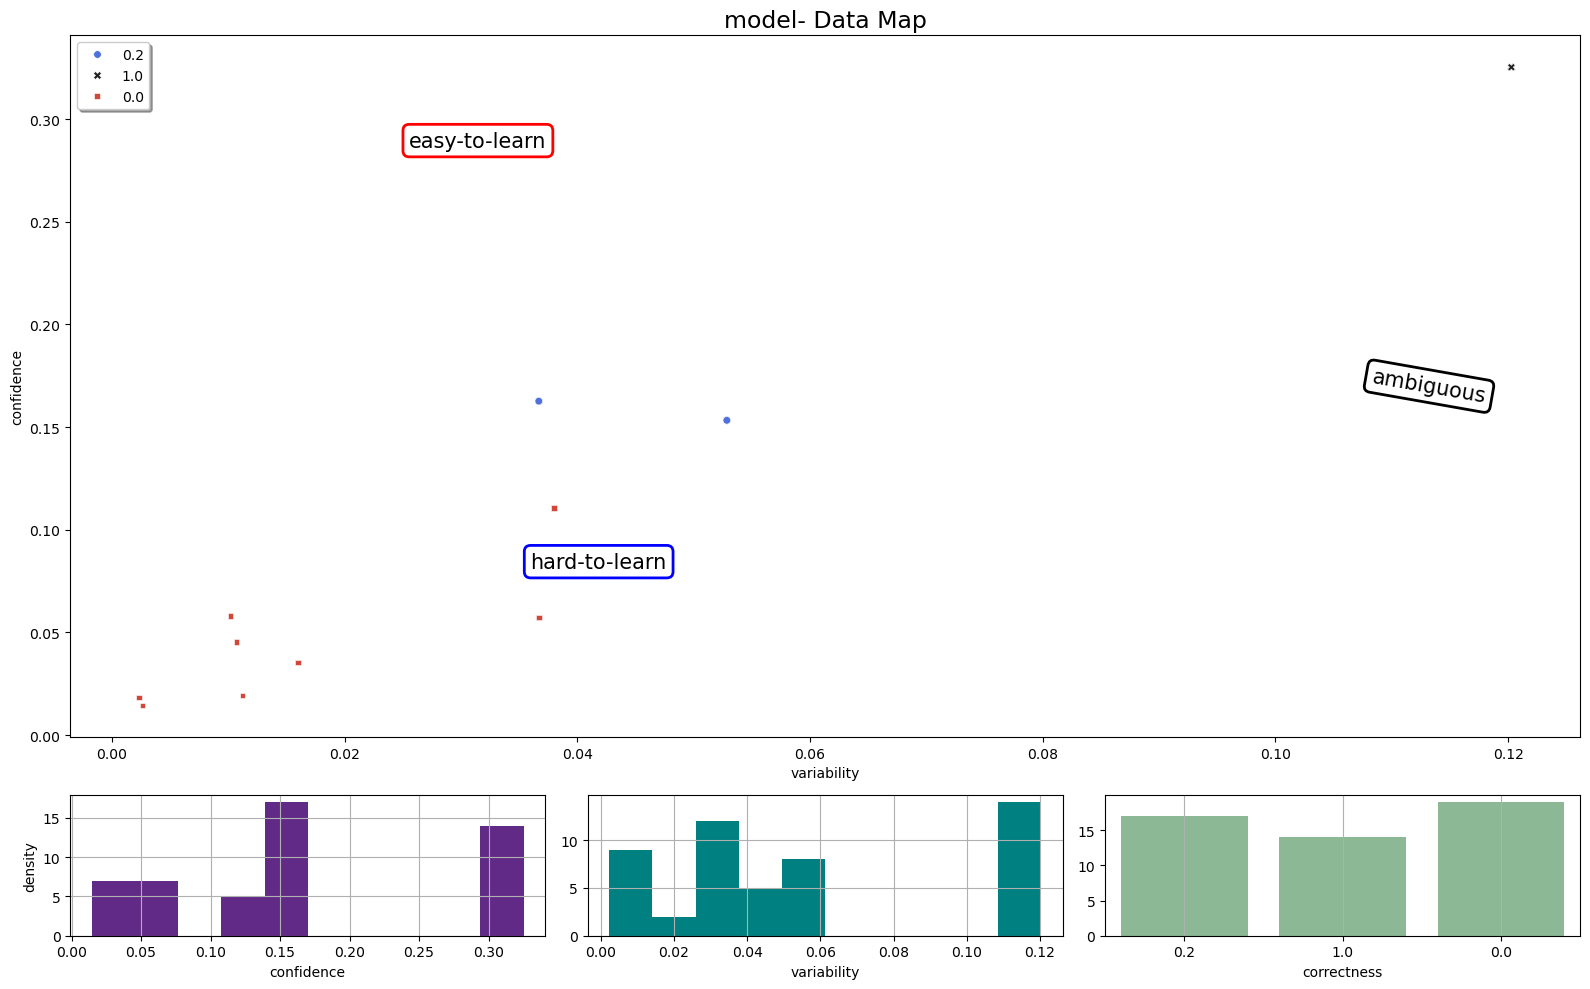

In [3]:
t2r2.loop(config_path="./config_run_data_cartography.yaml")

## Step 2:Perform experiments on subsets. 

You can now perform experiments: sampling data directly from the most ambiguous examples, the hard-to-learn examples and the easy-to-learn examples, You can also add randomly sapled fraction of data. The data will not allow for sampling with replacement.


Ensure now your config has perform_data_cartography set to False, and the data cartography selector is enabled!

```

training:
  dataset_path: ../../data/featuresets/thedeep.subset.train.txt
  validation_dataset_path: ../../data/featuresets/thedeep.subset.validation.txt
  selectors:
    - args: 
       hard_to_learn: 0,
       easy-to-learn: 0.3,
       ambiguous: 0.1,
       random: 0.6
      name: data_cartography
  batch_size: 2
  epochs: 2
  learning_rate: 1e-3
  validation_size: 0.2
  output_dir: ClassificationBERT # set data_seed
  metric_for_best_model: f1_score

testing:
  dataset_path: ../../data/featuresets/thedeep.subset.test.txt
  selectors: [ ]
  results_file: ./file_test_results_experiment.pickle

control:
  dataset_path: ../../data/featuresets/thedeep.subset.control.txt
  results_file: ./file_control_results_experiment.pickle
```

In [3]:
t2r2.loop(config_path="./config_experiments_from_data_cartography_results.yaml")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ClassificationBERT_experiment\checkpoint-10
Configuration saved in ClassificationBERT_experiment\checkpoint-10\config.json
Model weights saved in ClassificationBERT_experiment\checkpoint-10\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ClassificationBERT_experiment\checkpoint-20
Configuration saved in ClassificationBERT_experiment\checkpoint-20\config.json
Model weights saved in ClassificationBERT_experiment\checkpoint-20\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint to ClassificationBERT_experiment\checkpoint-30
Configuration saved in ClassificationBERT_experiment\checkpoint-30\config.json
Model weights saved in ClassificationBERT_experiment\checkpoint-30\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 10
  Batch size = 2
Saving model checkpoint

***** Running Prediction *****
  Num examples = 9
  Batch size = 2


{'train_results': {'train_runtime': 204.0115,
  'train_samples_per_second': 0.588,
  'train_steps_per_second': 0.294,
  'total_flos': 15788080742400.0,
  'train_loss': 1.7322270711263021,
  'epoch': 6.0},
 'test_results': {'test_loss': 3.6215999126434326,
  'test_f1_score': 0.030303030303030304,
  'test_runtime': 4.0769,
  'test_samples_per_second': 2.453,
  'test_steps_per_second': 1.226},
 'control_results': {'test_loss': 3.9775822162628174,
  'test_f1_score': 0.07272727272727272,
  'test_runtime': 3.7033,
  'test_samples_per_second': 2.43,
  'test_steps_per_second': 1.35}}